# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [ ]:
# Read the data from csv file

df = pd.read_csv('/Users/mkollath/bikesharing/day.csv')

In [3]:
# Check the head 

df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check the descriptive information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA QUALITY CHECK ( understanding null values)



df.isnull().sum()

In [7]:
## Duplicate Check

df_copy = df.copy()

In [8]:
# checking the shape of new dataframe

df_copy.shape

(730, 16)

In [9]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

In [10]:
# verifying the shape of new dataframe

df_copy.shape

(730, 16)

# Data Cleaning:

In [11]:
##The shape after running the drop duplicate command is same as the original dataframe.

##Hence we can conclude that there were zero duplicate values in the dataset.



##Checking value_counts() for entire dataframe.

##This will help to identify any Unknow/Junk values present in the dataset

df.value_counts(ascending=False).head(1)

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985    1
Name: count, dtype: int64

In [12]:
## Dropping the unwanted columns

## instant : Its only an index value

## dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence this column is not required

## casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
# encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
# encoding/mapping the month column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
 # encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [17]:
# encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [18]:
# check the column info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising the data

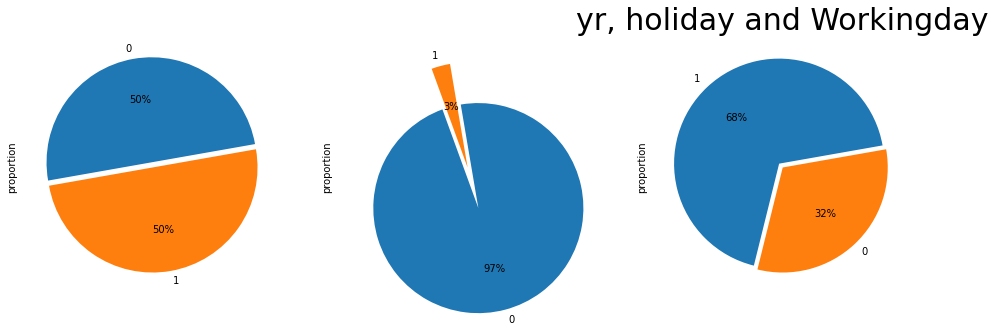

In [19]:

## Univariate Analysis

plt.figure(figsize = [16,15])
plt.subplot(131)
df['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
df['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
df['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

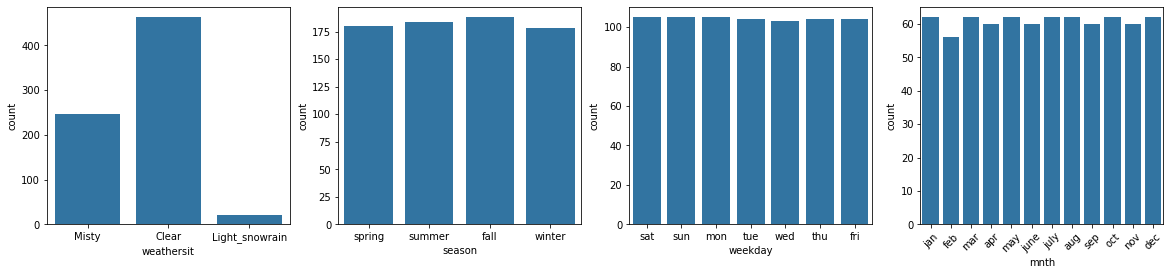

In [20]:
## barplot creation for categorical variables 
## visualizing Binary Columns (Categorical Variables)

plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = df, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = df, x = 'season')
plt.subplot(143)
sns.countplot(data = df, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'mnth')
plt.show()

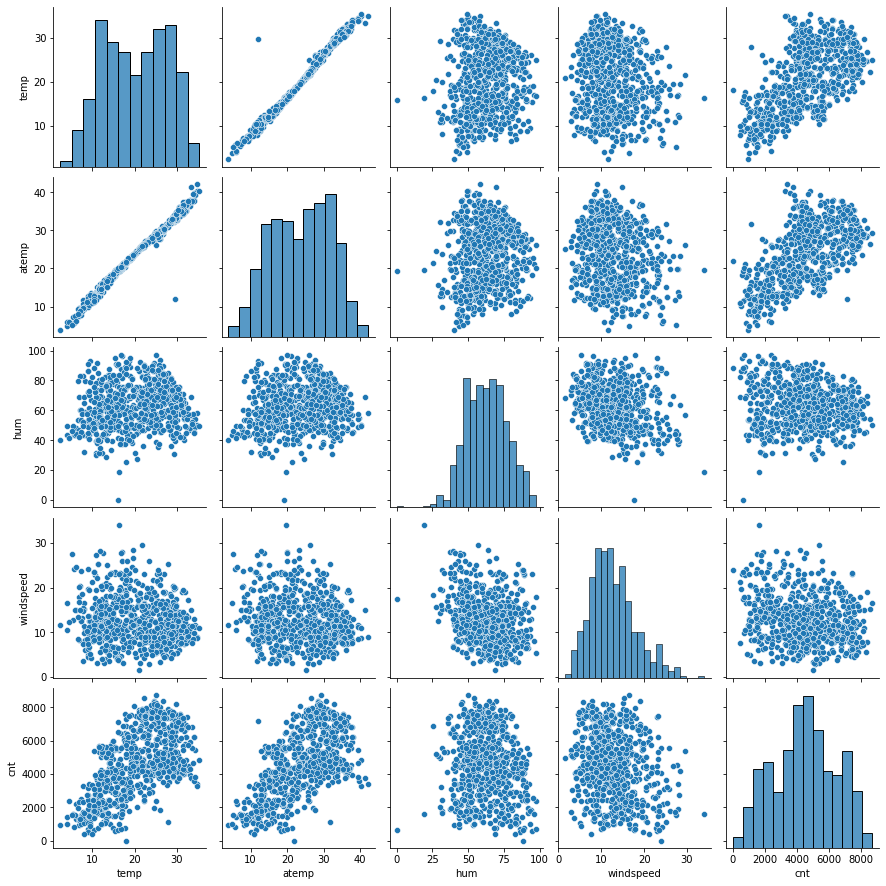

In [21]:


# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()


# Bivariate Analysis

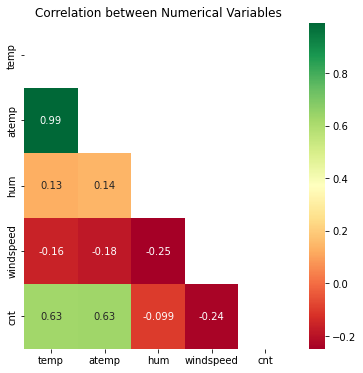

In [22]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()


# Can see a linear relationship between temp and atemp. 
# Both of the parameters cannot be used in the model due to multicolinearity. 

In [23]:
## Data Preparation

# dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [24]:
# merging  the dataframe, with the dummy variable dataset. 

df = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,True,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,False,True,False,False,False,False,True,True,False,False
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,False,False,False,True,False,False
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,False,False,False,True,False,False,False,True,False,False
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,True,False,False,True,False,False


In [27]:
# dropping unnecessary columns 

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

In [29]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [30]:
df.shape

(730, 30)

In [31]:
## Splitting the Data into Training and Testing Sets
import sklearn
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [32]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [33]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    int64  
 8   aug             510 non-null    bool   
 9   dec             510 non-null    bool   
 10  feb             510 non-null    bool   
 11  jan             510 non-null    bool   
 12  july            510 non-null    bool   
 13  june            510 non-null    bool   
 14  mar             510 non-null    bool   
 15  may             510 non-null    bool   
 16  nov             510 non-null    bool   
 17  oct             510 non-null    bool  

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   hum             220 non-null    float64
 6   windspeed       220 non-null    float64
 7   cnt             220 non-null    int64  
 8   aug             220 non-null    bool   
 9   dec             220 non-null    bool   
 10  feb             220 non-null    bool   
 11  jan             220 non-null    bool   
 12  july            220 non-null    bool   
 13  june            220 non-null    bool   
 14  mar             220 non-null    bool   
 15  may             220 non-null    bool   
 16  nov             220 non-null    bool   
 17  oct             220 non-null    bool  

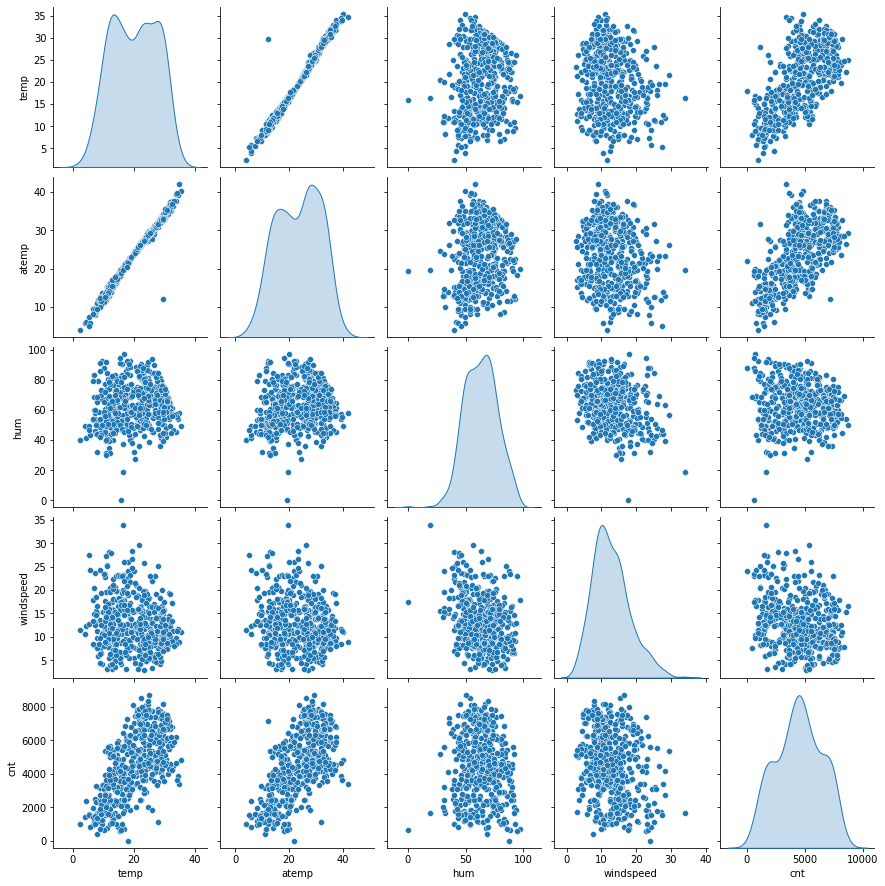

In [36]:
# Create a new dataframe of only numeric variables:

df_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

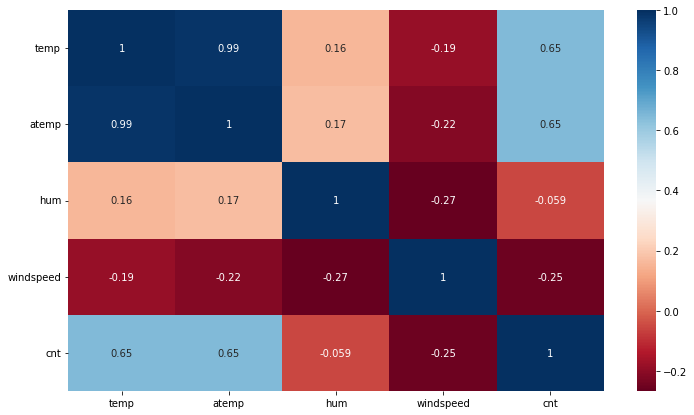

In [37]:
# correlation plot

plt.figure(figsize = (12,7))
sns.heatmap(df_num.corr(), annot = True, cmap="RdBu")
#plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

##The above correlation plot tells us that there is a high correlation between 'temp','atemp' vs 'cnt'


In [39]:
# Using MinMaxScaler to Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
# verifying the head of dataset before scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,False,False,False,False,False,True,False,True,False


In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
# verifying the head after appying scaling.

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,True,False,False,False,False,False,True,True,False,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,True,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,True,False,False,False,False,False,True,False,True,False
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,False,False,False,False,False,True,False,True,False


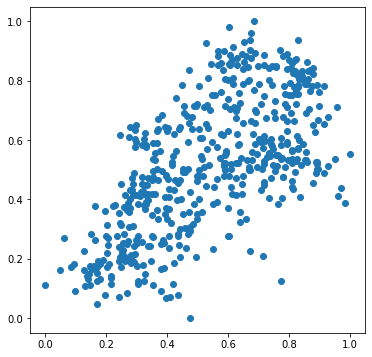

In [43]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [44]:
## By visualising the plot we can confirm that the positive correlation between temp and cnt.

# Building the Linear Model
# Dividing into X and Y sets for the model building

In [45]:


y_train = df_train.pop('cnt')
X_train = df_train
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [50]:
# recursive feature elimination 
# Recursive feature elimination 

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Specify step parameter explicitly
rfe = RFE(estimator=lm, n_features_to_select=15, step=1)

# Running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [68]:
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   aug             510 non-null    bool   
 8   dec             510 non-null    bool   
 9   feb             510 non-null    bool   
 10  jan             510 non-null    bool   
 11  july            510 non-null    bool   
 12  june            510 non-null    bool   
 13  mar             510 non-null    bool   
 14  may             510 non-null    bool   
 15  nov             510 non-null    bool   
 16  oct             510 non-null    bool   
 17  sep             510 non-null    bool  

In [70]:

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [71]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [72]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]


In [84]:

# Convert boolean columns to numeric (0 or 1)
bool_columns = ['jan', 'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter']
X_train_rfe.loc[:, bool_columns] = X_train_rfe.loc[:, bool_columns].astype(int)




In [85]:
print(X_train_rfe.dtypes)

yr                  int64
holiday             int64
workingday          int64
temp              float64
hum               float64
windspeed         float64
jan                 int64
july                int64
sep                 int64
sat                 int64
Light_snowrain      int64
Misty               int64
spring              int64
summer              int64
winter              int64
dtype: object


In [86]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          4.22e-191
Time:                        11:26:53   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [87]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [92]:
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


In [91]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [93]:
## VIF doesnt seems to be affected much after dropping few of the variables. Will check further  to observe better model.

# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.60e-188
Time:                        11:32:53   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [96]:


# drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,yr,2.07
12,winter,1.98
7,sat,1.96
5,july,1.58
9,Misty,1.57


In [97]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          1.28e-188
Time:                        12:04:36   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1576      0.031      5.

In [ ]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

In [100]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Tue, 16 Jan 2024   Prob (F-statistic):          3.16e-188
Time:                        12:06:29   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1484      0.031      4.

In [ ]:
# We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
# F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [101]:
## Residual Analysis of the train data and validation

X_train_lm_5

,const,yr,holiday,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,1,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.380981,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,0,1,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,1,0,0,1
79,1.0,0,0,1,0.462664,0.529881,0,0,0,1,0,1,0


In [103]:
y_train_pred = lr_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

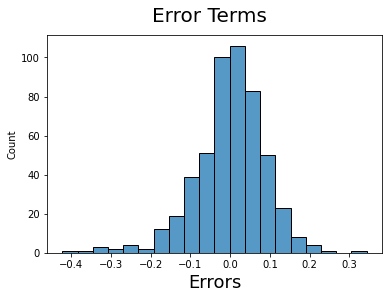

In [105]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.histplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

# Multi Colinearity

calculateVIF(X_train_new)

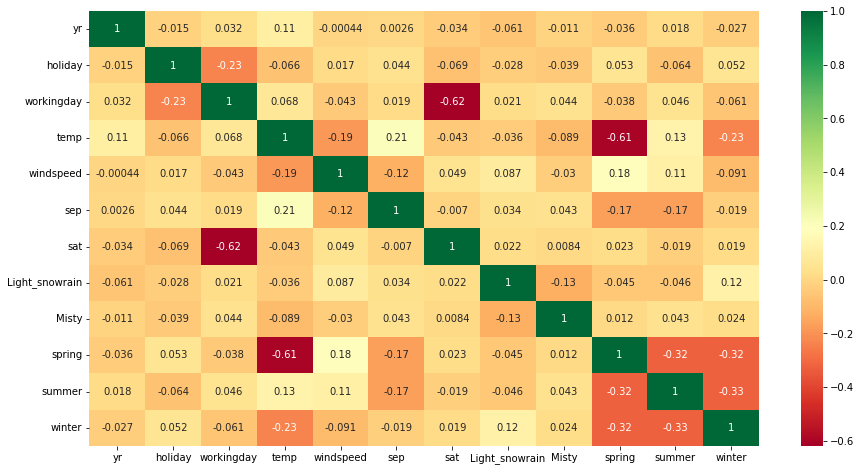

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [ ]:
#VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

# Linearity
# Linear relationship validation using CCPR plot
# Component and component plus residual plot



sm.graphics.plot_ccpr(lr_5, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_5, 'windspeed')
plt.show()

In [110]:
# Making Predictions Using the Final Model
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,False,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,False,False,True,False,False,False,True,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,False,False,True,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,False,False,True,False,False,False,False,False,True,False


In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   hum             220 non-null    float64
 6   windspeed       220 non-null    float64
 7   cnt             220 non-null    float64
 8   aug             220 non-null    bool   
 9   dec             220 non-null    bool   
 10  feb             220 non-null    bool   
 11  jan             220 non-null    bool   
 12  july            220 non-null    bool   
 13  june            220 non-null    bool   
 14  mar             220 non-null    bool   
 15  may             220 non-null    bool   
 16  nov             220 non-null    bool   
 17  oct             220 non-null    bool  

In [121]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474


In [142]:
y_test = df_test
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   atemp           220 non-null    float64
 5   hum             220 non-null    float64
 6   windspeed       220 non-null    float64
 7   aug             220 non-null    bool   
 8   dec             220 non-null    bool   
 9   feb             220 non-null    bool   
 10  jan             220 non-null    bool   
 11  july            220 non-null    bool   
 12  june            220 non-null    bool   
 13  mar             220 non-null    bool   
 14  may             220 non-null    bool   
 15  nov             220 non-null    bool   
 16  oct             220 non-null    bool   
 17  sep             220 non-null    bool  

In [127]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_5 = sm.add_constant(X_test)

In [132]:
df.head() 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [143]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   workingday      220 non-null    int64  
 4   temp            220 non-null    float64
 5   windspeed       220 non-null    float64
 6   sep             220 non-null    bool   
 7   sat             220 non-null    bool   
 8   Light_snowrain  220 non-null    bool   
 9   Misty           220 non-null    bool   
 10  spring          220 non-null    bool   
 11  summer          220 non-null    bool   
 12  winter          220 non-null    bool   
dtypes: bool(7), float64(3), int64(3)
memory usage: 13.5 KB


In [145]:
y_pred = lr_5.predict(X_test_lm5)

In [148]:
##MODEL EVALUATION
# Get the shape of X_test
X_test.shape

(220, 12)

In [150]:
# Adjusted R^2 Value for TEST

# We already have the value of R^2 (calculated in above step)

r2=0.8224454904426144

# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8121524753958095

In [151]:
##Final Result Comparison
# Train R^2 :0.817
# Train Adjusted R^2 :0.813
# Test R^2 :0.822
# Test Adjusted R^2 :0.813
# This seems to be a really good model that can very well 'Generalize' various datasets.

r2_train=0.817
r2_test=0.822

# Checking the difference between the test-train r2 score 
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)


Train_Adjusted_R2 = 0.813
Test_Adjusted_R2 = 0.813

# Checking the difference between the test-train Adjusted_R2 score 
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

Difference in r2 Score(%) 0.5000000000000004
Difference in Adjusted_R2 Score(%) 0.0


# Final Analysis

According to our final model analysis, the three most influential predictor variables affecting bike bookings are as follows:

Temperature (temp):
The coefficient value of 0.375922 suggests that for every unit increase in the temperature variable, there is a corresponding increase of 0.375922 units in bike hire numbers. In simpler terms, higher temperatures are positively correlated with higher bike bookings.

Weather Situation 3 (weathersit_3) - (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered):
The coefficient value of -0.333164 indicates that, concerning Weathersit_3, a unit increase in the Weathersit_3 variable results in a decrease of 0.333164 units in bike hire numbers. In other words, adverse weather conditions as represented by Weathersit_3 are associated with a reduction in bike bookings.

Year (yr):
With a coefficient value of 0.232965, a unit increase in the year variable is linked to a rise of 0.232965 units in bike hire numbers. This implies that bike bookings have been increasing over the years, suggesting a positive trend in demand.

Given these findings, it is recommended to prioritize these variables when planning, as they have a significant impact on achieving maximum bike bookings.